

# Project: Investigate a Dataset (TMDb dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, I am investigating a TMDb movies database.

In [12]:
#Use this cell to set up import statements for all of the packages that you

#Plan to use.

#Remember to include a 'magic word' so that your visualizations are plotted
#inline with the notebook. See this page for more:

#http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import csv #read and write csv files
from datetime import datetime #operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline

In [13]:
#reading tmdb csv file and storing that to a variable
data="E:/tmdb-movies.csv"
film=pd.read_csv(data,encoding='utf-8')

#print out the first 5 rows of data in my dataset

film.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Questions I want to explore after seeing the data

### 1. Highest and Lowest budget movies

### 2. Highest and Lowest runtime of movies

### 3. Recent trends in profits made by the movies

### 4. Runtime distribution of the movies

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [14]:
#Load your data and print out a few lines. Perform operations to inspect data
#types and look for instances of missing or possibly errant data.
import numpy as np
import pandas as pd
import csv #read and write csv files
from datetime import datetime #operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline



## Showing data types

In [15]:
#reading tmdb csv file and storing that to a variable
data="E:/tmdb-movies.csv"
film=pd.read_csv(data, encoding='utf-8')
#showing data types of the columns
film.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Converting float to int

In [16]:
#applymap function changes the columns data type to the type 'argument' we pass
datafloat=['popularity', 'revenue_adj','budget_adj','vote_average']

film[datafloat]=film[datafloat].applymap(np.int64)
#shwoing the datatypes of the columns
film.dtypes

id                       int64
imdb_id                 object
popularity               int64
budget                   int64
revenue                  int64
original_title          object
cast                    object
homepage                object
director                object
tagline                 object
keywords                object
overview                object
runtime                  int64
genres                  object
production_companies    object
release_date            object
vote_count               int64
vote_average             int64
release_year             int64
budget_adj               int64
revenue_adj              int64
dtype: object

### Converting 'release_date' format to 'date_format'

In [16]:
#calling the column which need to be formatted in datetime and storing those values in them
film.release_date = pd.to_datetime(film['release_date'])
#showing the dataset
film.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6,2015,137999939,1392445892
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7,2015,137999939,348161292
2,262500,tt2908446,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6,2015,101199955,271619025


'release_date' column has been changed to date format. (year-month-day)

# Data Cleaning (Dropping rows and colums that we dont need )

### Let's see that how many entries are there in the dataset.

In [17]:
#After discussing the structure of the data and any problems that need to be
#Cleaned, perform those cleaning steps in the second part of this section.
film.shape



(10866, 21)

## It means that we have 10866 rows and 21 columns

## Dropping the data that we don't need.

In [18]:
#lets give a list of data that needs to be deleted
del_col = [ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
#deleting the columns from the database
film = film.drop(del_col,axis = 1)
#now take a look at this new dataset
film.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


### Dropping duplicate values

In [19]:
#will drop duplicate rows but will keep the first one
film.drop_duplicates(keep = 'first', inplace = True)
#now lets see how many entries are there
film.shape


(10865, 11)

#### We had one duplicate copy of a movie. Now we have 10865 movie entries.

## Now first let us check if we have any movie with a runtime value of 0. If we have any, we will replace with NaN.

In [20]:
#replacing 0 with NaN of runtime column of the data.
film['runtime']=film['runtime'].replace(0, np.NaN)

<a id='eda'></a>
# Exploratory Data Analysis

### Research Question 1 (Which movie has highest and lowest budget)

In [21]:
#Use this, and more code cells, to explore your data. Don't forget to add
#Markdown cells to document your observations and findings.
def sort(column_name):
    
    #taking the index value of the highest number in budget column
    high=film[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    high_index=pd.DataFrame(film.loc[high])
    
    #same as above
    low=film[column_name].idxmin()
    low_index=pd.DataFrame(film.loc[low])
    
    #concatenating two dataframes
    data=pd.concat([high_index,low_index], axis = 1)
    
    return data

#calling the function and passing the argument
sort('budget')


,2244,30
popularity,0,3
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
tagline,Assassin. Hero. Legend.,The man behind the myth
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
release_date,12/2/10,6/19/15


# Research Question 2: Which movie has the highest and the lowest runtime ?

In [22]:
sort('runtime')

,3894,4883
popularity,0,0
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
tagline,NaN,NaN
runtime,900,2
genres,Documentary,Animation
release_date,2011-09-03 00:00:00,2012-03-02 00:00:00


# Research Question 3(Average runtime of all movies)


In [22]:
#giving a function which calculates average of a particular column
def average(column_name):
    
    return film[column_name].mean()

In [23]:
#calling function to show the mean
average('runtime')

102.3638545320288

### Average runtime is approx 102 minutes

# Now lets plot a graph on runtime distribution of all movies

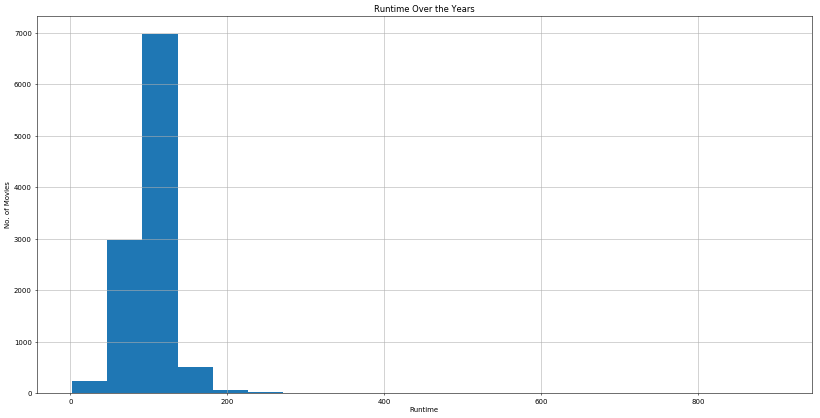

In [24]:
#displays the plot
#plt.show()
plt.figure(figsize=(20,10),dpi=50)
film['runtime'].hist(rwidth=1,bins=20)
plt.xlabel('Runtime')
plt.title('Runtime Over the Years');
plt.ylabel('No. of Movies')
plt.show()




The above graph shows us that how many movies lie between the time interval shown above. We can see that the tallest bar here is time interval between 90-120 min(approx). The distribution of this graph is positively skewed or right skewed!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DE509BF60>,
      dtype=object)

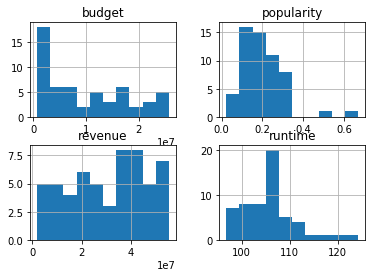

In [26]:
film=film.groupby('release_year').mean()
film.hist()

# Research Question 4(Recent trends in profits made by the movies)

### Firstly, we have to calculate the profit.

In [27]:
#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
film.insert(2,'profit',film['revenue']-film['budget'])
#we change the data type to int
film['profit']=film['profit'].apply(np.int64)
#showing the dataset
film.head(3)

,popularity,budget,profit,revenue,runtime
release_year,,,,,
1960,0.125000,6.892796e+05,3842126,4.531406e+06,110.656250
1961,0.096774,1.488290e+06,9405909,1.089420e+07,119.419355
1962,0.125000,1.710066e+06,5026803,6.736870e+06,124.343750


## Plotting the graph

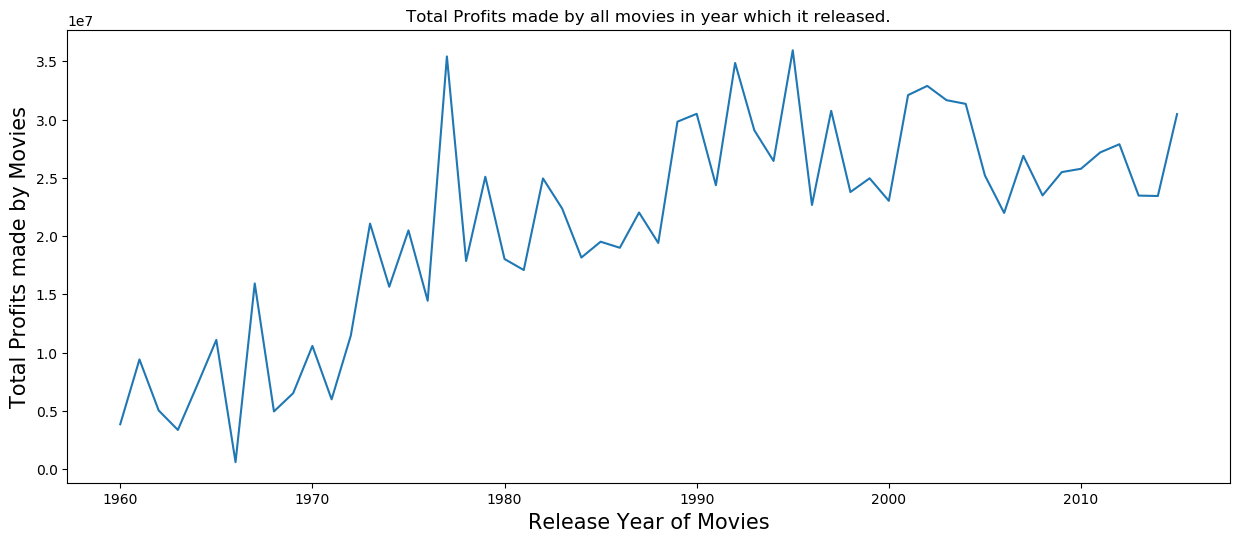

In [28]:
#Line plot has been used for this
#Since we want to know the profits of movies for every year, we need to group all the movies for those years
#The groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
profit_by_year=film.groupby('release_year')['profit'].sum()
#giving the figure size(width, height)
plt.figure(figsize=(15,6),dpi = 100)
#labeling x-axis
plt.xlabel('Release Year of Movies',fontsize=15)
#labeling y-axis
plt.ylabel('Total Profits made by Movies',fontsize=15)
#title of a the plot
plt.title('Total Profits made by all movies in year which it released.')
#plotting what needs to be plotted
plt.plot(profit_by_year)
#showing the plot
plt.show()

Text(0.5,1,'Profit vs Popularity Over the Years')

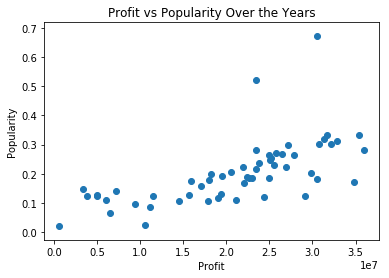

In [29]:
plt.scatter(x=film['profit'], y=film['popularity'])
plt.xlabel('Profit')
plt.ylabel('Popularity')
plt.title('Profit vs Popularity Over the Years')

### We can see that each year did not have the same amount of movies released. The year 2014(approx) had the maximum movie releases than any other year. More the old movies, the less are the releases that year (atleast this is what the dataset shows us). And it also shows us that the highest profit is in the year 2014 and is more than any other year 

<a id='conclusions'></a>
# Conclusions


## The following conclusions have been made after investigating the data for TMDb movies:

## 1. The no. of people who watch movies has increased significantly over the years as the profits have increased.
## 2. The runtime has decreased significantly over the years as the avg. runtime of movies is just 102 minutes(approx).
## 3. Most of the movies have a runtime between 90-120 minutes(approx).

# Limitations:

## 1. We don't consider income sources like ticket sales, digital sales, audio rights, etc. while computing net profit.
## 2. We also don't consider factor of varying currencies as the movies are released in different countries as well.